In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def plot_median_quantiles(x, y, color, label):
    plt.fill_between(x, np.quantile(y, q=0.25, axis=0), np.quantile(y, q=0.75, axis=0), facecolor=color, alpha=0.15)
    plt.plot(x, np.median(y, axis=0), c=color, label=label)

In [4]:
save_files = False

def save_plot(name, save_this_one=False):
    if save_files or save_this_one:
        plt.savefig(f'{name}.eps', format='eps')

In [5]:
plt.rcParams["figure.figsize"] = (8, 6)

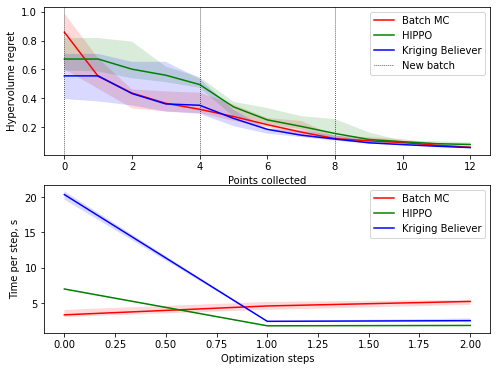

In [6]:
batch_mc_hv_regret = np.loadtxt("results/BatchMC_Simple1D_n_initial_points_3_n_query_points_4_n_optimization_steps_3_n_repeats_10_seed_None", delimiter=",")
hippo_hv_regret = np.loadtxt("results/HIPPO_Simple1D_n_initial_points_3_n_query_points_4_n_optimization_steps_3_n_repeats_10_seed_None", delimiter=",")
kb_hv_regret = np.loadtxt("results/KB_Simple1D_n_initial_points_3_n_query_points_4_n_optimization_steps_3_n_repeats_10_seed_None", delimiter=",")

batch_mc_time = np.loadtxt("results/BatchMC_Simple1D_n_initial_points_3_n_query_points_4_n_optimization_steps_3_n_repeats_10_seed_None_time", delimiter=",")
hippo_time = np.loadtxt("results/HIPPO_Simple1D_n_initial_points_3_n_query_points_4_n_optimization_steps_3_n_repeats_10_seed_None_time", delimiter=",")
kb_time = np.loadtxt("results/KB_Simple1D_n_initial_points_3_n_query_points_4_n_optimization_steps_3_n_repeats_10_seed_None_time", delimiter=",")

n_query_points = 4
n_optimization_steps = 3

# regret
x = range(n_query_points * n_optimization_steps + 1)

fig, (ax1, ax2) = plt.subplots(2, 1)

plt.axes(ax1)
plot_median_quantiles(x, batch_mc_hv_regret, 'r', 'Batch MC')
plot_median_quantiles(x, hippo_hv_regret, 'g', 'HIPPO')
plot_median_quantiles(x, kb_hv_regret, 'b', 'Kriging Believer')
plt.axvline(x=0, c='k', ls=':', lw=0.75, label="New batch")
for xc in range(n_query_points, n_query_points * n_optimization_steps, n_query_points):
    plt.axvline(x=xc, c='k', ls=':', lw=0.75)
#plt.title("Simple1D, HV regret")
plt.xlabel("Points collected")
plt.ylabel("Hypervolume regret")
plt.legend()

# time per step
x = range(n_optimization_steps)

plt.axes(ax2)
plot_median_quantiles(x, batch_mc_time, 'r', 'Batch MC')
plot_median_quantiles(x, hippo_time, 'g', 'HIPPO')
plot_median_quantiles(x, kb_time, 'b', 'Kriging Believer')
#plt.title("Simple1D, time per step")
plt.xlabel("Optimization steps")
plt.ylabel("Time per step, s")
plt.legend()

plt.show()

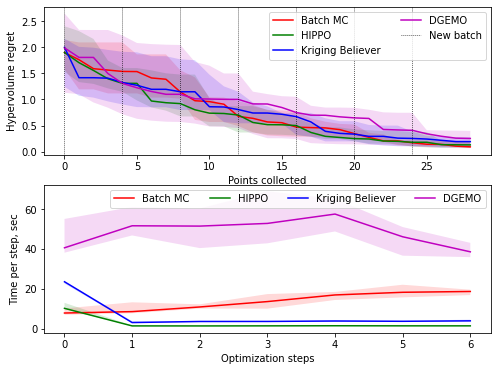

In [7]:
batch_mc_hv_regret = np.loadtxt("results/BatchMC_Gardner2D_n_initial_points_3_n_query_points_4_n_optimization_steps_7_n_repeats_10_seed_None", delimiter=",")
hippo_hv_regret = np.loadtxt("results/HIPPO_Gardner2D_n_initial_points_3_n_query_points_4_n_optimization_steps_7_n_repeats_10_seed_None", delimiter=",")
kb_hv_regret = np.loadtxt("results/KB_Gardner2D_n_initial_points_3_n_query_points_4_n_optimization_steps_7_n_repeats_10_seed_None", delimiter=",")
dgemo_hv_regret = np.loadtxt("results/DGEMO_gardner_n_initial_points_3_n_query_points_4_n_optimization_steps_7_n_repeats_10_seed_None", delimiter=",")

batch_mc_time = np.loadtxt("results/BatchMC_Gardner2D_n_initial_points_3_n_query_points_4_n_optimization_steps_7_n_repeats_10_seed_None_time", delimiter=",")
hippo_time = np.loadtxt("results/DistanceBased_Gardner2D_n_initial_points_3_n_query_points_4_n_optimization_steps_7_n_repeats_10_seed_None_time", delimiter=",")
kb_time = np.loadtxt("results/KB_Gardner2D_n_initial_points_3_n_query_points_4_n_optimization_steps_7_n_repeats_10_seed_None_time", delimiter=",")
dgemo_time = np.loadtxt("results/DGEMO_gardner_n_initial_points_3_n_query_points_4_n_optimization_steps_7_n_repeats_10_seed_None_time", delimiter=",")

n_query_points = 4
n_optimization_steps = 7

fig, (ax1, ax2) = plt.subplots(2, 1)

# regret
x = range(n_query_points * n_optimization_steps + 1)

plt.axes(ax1)
plot_median_quantiles(x, batch_mc_hv_regret, 'r', 'Batch MC')
plot_median_quantiles(x, hippo_hv_regret, 'g', 'HIPPO')
plot_median_quantiles(x, kb_hv_regret, 'b', 'Kriging Believer')
plot_median_quantiles(x, dgemo_hv_regret, 'm', 'DGEMO')
plt.axvline(x=0, c='k', ls=':', lw=0.75, label="New batch")
for xc in range(n_query_points, n_query_points * n_optimization_steps, n_query_points):
    plt.axvline(x=xc, c='k', ls=':', lw=0.75)
# plt.title("Gardner, HV regret")
plt.xlabel("Points collected")
plt.ylabel("Hypervolume regret")
plt.legend(ncol=2)
# save_plot('gardner_hv_regret')
# plt.show()
    
# time per step
x = range(n_optimization_steps)

plt.axes(ax2)
plot_median_quantiles(x, batch_mc_time, 'r', 'Batch MC')
plot_median_quantiles(x, hippo_time, 'g', 'HIPPO')
plot_median_quantiles(x, kb_time, 'b', 'Kriging Believer')
plot_median_quantiles(x, dgemo_time, 'm', 'DGEMO')
# plt.title("Gardner, time per step")
plt.xlabel("Optimization steps")
plt.ylabel("Time per step, sec")
plt.legend(ncol=4, loc="upper right")
save_plot('gardner')
plt.show()

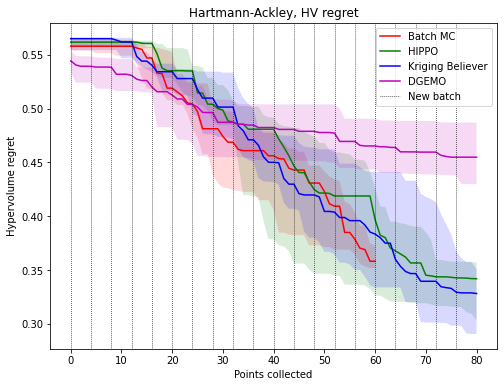

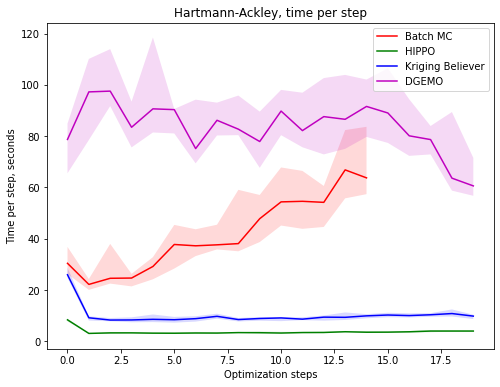

In [8]:
batch_mc_hv_regret = np.loadtxt("results/BatchMC_Hartmann-Ackley-Scaled_n_initial_points_6_n_query_points_4_n_optimization_steps_15_n_repeats_10_seed_None", delimiter=",")
hippo_hv_regret = np.loadtxt("results/HIPPO_Hartmann-Ackley-Scaled_n_initial_points_6_n_query_points_4_n_optimization_steps_20_n_repeats_10_seed_None", delimiter=",")
kb_hv_regret = np.loadtxt("results/KB_Hartmann-Ackley-Scaled_n_initial_points_6_n_query_points_4_n_optimization_steps_20_n_repeats_10_seed_None", delimiter=",")
dgemo_hv_regret = np.loadtxt("results/DGEMO_ha_n_initial_points_6_n_query_points_4_n_optimization_steps_20_n_repeats_10_seed_None", delimiter=",")

batch_mc_time = np.loadtxt("results/BatchMC_Hartmann-Ackley-Scaled_n_initial_points_6_n_query_points_4_n_optimization_steps_15_n_repeats_10_seed_None_time", delimiter=",")
hippo_time = np.loadtxt("results/HIPPO_Hartmann-Ackley-Scaled_n_initial_points_6_n_query_points_4_n_optimization_steps_20_n_repeats_10_seed_None_time", delimiter=",")
kb_time = np.loadtxt("results/KB_Hartmann-Ackley-Scaled_n_initial_points_6_n_query_points_4_n_optimization_steps_20_n_repeats_10_seed_None_time", delimiter=",")
dgemo_time = np.loadtxt("results/DGEMO_ha_n_initial_points_6_n_query_points_4_n_optimization_steps_20_n_repeats_10_seed_None_time", delimiter=",")

n_query_points = 4
n_optimization_steps = 20


# regret
x = range(n_query_points * n_optimization_steps + 1)

plot_median_quantiles(x[:15*n_query_points+1], batch_mc_hv_regret, 'r', 'Batch MC')
plot_median_quantiles(x, hippo_hv_regret, 'g', 'HIPPO')
plot_median_quantiles(x, kb_hv_regret, 'b', 'Kriging Believer')
plot_median_quantiles(x, dgemo_hv_regret, 'm', 'DGEMO')
plt.axvline(x=0, c='k', ls=':', lw=0.75, label="New batch")
for xc in range(n_query_points, n_query_points * n_optimization_steps, n_query_points):
    plt.axvline(x=xc, c='k', ls=':', lw=0.75)
plt.title("Hartmann-Ackley, HV regret")
plt.xlabel("Points collected")
plt.ylabel("Hypervolume regret")
plt.legend()
save_plot('hartmann-ackley_hv_regret')
plt.show()
    
# time per step
x = range(n_optimization_steps)

plot_median_quantiles(x[:15], batch_mc_time, 'r', 'Batch MC')
plot_median_quantiles(x, hippo_time, 'g', 'HIPPO')
plot_median_quantiles(x, kb_time, 'b', 'Kriging Believer')
plot_median_quantiles(x, dgemo_time, 'm', 'DGEMO')
plt.title("Hartmann-Ackley, time per step")
plt.xlabel("Optimization steps")
plt.ylabel("Time per step, seconds")
plt.legend()
save_plot('hartmann-ackley_time')
plt.show()

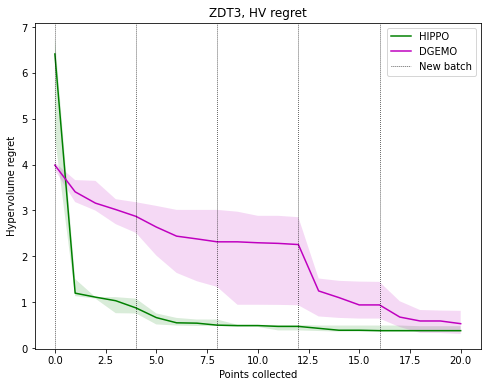

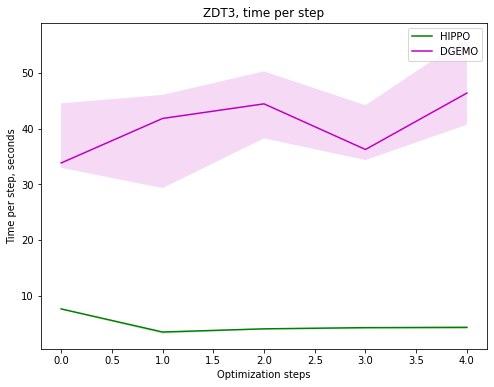

In [9]:
# This stopped working for some reason for both Batch MC and KB
# They keep failing with Cholesky errors very early into the optimization

# batch_mc_hv_regret = np.loadtxt("results/BatchMC_ZDT3_n_initial_points_3_n_query_points_4_n_optimization_steps_5_n_repeats_10_seed_None", delimiter=",")
hippo_hv_regret = np.loadtxt("results/HIPPO_ZDT3_n_initial_points_3_n_query_points_4_n_optimization_steps_5_n_repeats_10_seed_None", delimiter=",")
dgemo_hv_regret = np.loadtxt("results/DGEMO_zdt3_n_initial_points_3_n_query_points_4_n_optimization_steps_5_n_repeats_10_seed_None", delimiter=",")
# kb_hv_regret = np.loadtxt("results/KB_ZDT3_n_initial_points_3_n_query_points_4_n_optimization_steps_5_n_repeats_10_seed_None", delimiter=",")

# batch_mc_time = np.loadtxt("results/BatchMC_ZDT3_n_initial_points_3_n_query_points_4_n_optimization_steps_5_n_repeats_10_seed_None_time", delimiter=",")
hippo_time = np.loadtxt("results/HIPPO_ZDT3_n_initial_points_3_n_query_points_4_n_optimization_steps_5_n_repeats_10_seed_None_time", delimiter=",")
dgemo_time = np.loadtxt("results/DGEMO_zdt3_n_initial_points_3_n_query_points_4_n_optimization_steps_5_n_repeats_10_seed_None_time", delimiter=",")
# kb_time = np.loadtxt("results/KB_ZDT3_n_initial_points_3_n_query_points_4_n_optimization_steps_5_n_repeats_10_seed_None_time", delimiter=",")

n_query_points = 4
n_optimization_steps = 5


# regret
x = range(n_query_points * n_optimization_steps + 1)

# plot_median_quantiles(x, batch_mc_hv_regret, 'r', 'Batch MC')
plot_median_quantiles(x, hippo_hv_regret, 'g', 'HIPPO')
plot_median_quantiles(x, dgemo_hv_regret, 'm', 'DGEMO')
# plot_median_quantiles(x, kb_hv_regret, 'b', 'Kriging Believer')
plt.axvline(x=0, c='k', ls=':', lw=0.75, label="New batch")
for xc in range(n_query_points, n_query_points * n_optimization_steps, n_query_points):
    plt.axvline(x=xc, c='k', ls=':', lw=0.75)
plt.title("ZDT3, HV regret")
plt.xlabel("Points collected")
plt.ylabel("Hypervolume regret")
plt.legend()
plt.show()


# time per step
x = range(n_optimization_steps)

# plot_median_quantiles(x, batch_mc_time, 'r', 'Batch MC')
plot_median_quantiles(x, hippo_time, 'g', 'HIPPO')
plot_median_quantiles(x, dgemo_time, 'm', 'DGEMO')
# plot_median_quantiles(x, kb_time, 'b', 'Kriging Believer')
plt.title("ZDT3, time per step")
plt.xlabel("Optimization steps")
plt.ylabel("Time per step, seconds")
plt.legend()
plt.show()

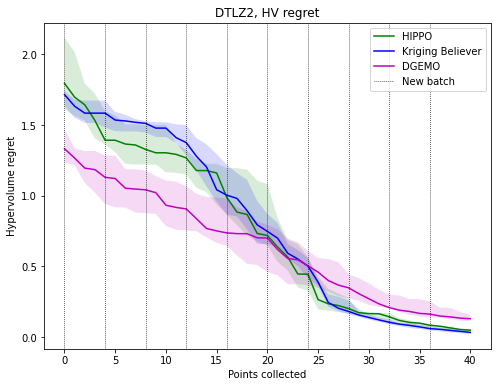

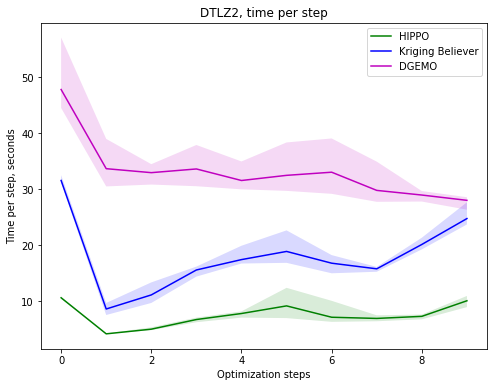

In [10]:
hippo_hv_regret = np.loadtxt("results/HIPPO_DTLZ2_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None", delimiter=",")
kb_hv_regret = np.loadtxt("results/KB_DTLZ2_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None", delimiter=",")
dgemo_regret = np.loadtxt("results/DGEMO_dtlz2_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None", delimiter=",")

hippo_time = np.loadtxt("results/HIPPO_DTLZ2_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None_time", delimiter=",")
kb_time = np.loadtxt("results/KB_DTLZ2_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None_time", delimiter=",")
dgemo_time = np.loadtxt("results/DGEMO_dtlz2_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None_time", delimiter=",")

n_query_points = 4
n_optimization_steps = 10


# regret
x = range(n_query_points * n_optimization_steps + 1)

plot_median_quantiles(x, hippo_hv_regret, 'g', 'HIPPO')
plot_median_quantiles(x, kb_hv_regret, 'b', 'Kriging Believer')
plot_median_quantiles(x, dgemo_regret, 'm', 'DGEMO')
plt.axvline(x=0, c='k', ls=':', lw=0.75, label="New batch")
for xc in range(n_query_points, n_query_points * n_optimization_steps, n_query_points):
    plt.axvline(x=xc, c='k', ls=':', lw=0.75)
plt.title("DTLZ2, HV regret")
plt.xlabel("Points collected")
plt.ylabel("Hypervolume regret")
plt.legend()
save_plot('dtlz2_hv_regret')
plt.show()


# time per step
x = range(n_optimization_steps)

plot_median_quantiles(x, hippo_time, 'g', 'HIPPO')
plot_median_quantiles(x, kb_time, 'b', 'Kriging Believer')
plot_median_quantiles(x, dgemo_time, 'm', 'DGEMO')
plt.title("DTLZ2, time per step")
plt.xlabel("Optimization steps")
plt.ylabel("Time per step, seconds")
plt.legend()
save_plot('dtlz2_time')
plt.show()

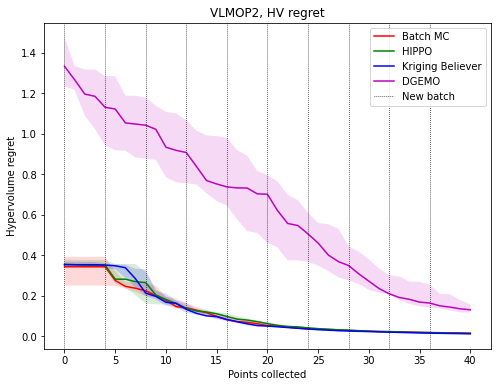

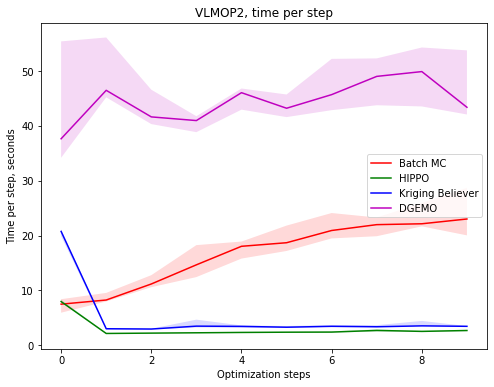

In [11]:
batch_mc_hv_regret = np.loadtxt("results/BatchMC_VLMOP2_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None", delimiter=",")
hippo_hv_regret = np.loadtxt("results/HIPPO_VLMOP2_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None", delimiter=",")
kb_hv_regret = np.loadtxt("results/KB_VLMOP2_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None", delimiter=",")
dgemo_hv_regret = np.loadtxt("results/DGEMO_vlmop2_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None", delimiter=",")

batch_mc_time = np.loadtxt("results/BatchMC_VLMOP2_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None_time", delimiter=",")
hippo_time = np.loadtxt("results/HIPPO_VLMOP2_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None_time", delimiter=",")
kb_time = np.loadtxt("results/KB_VLMOP2_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None_time", delimiter=",")
dgemo_time = np.loadtxt("results/DGEMO_vlmop2_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None_time", delimiter=",")

n_query_points = 4
n_optimization_steps = 10



# regret
x = range(n_query_points * n_optimization_steps + 1)

plot_median_quantiles(x, batch_mc_hv_regret, 'r', 'Batch MC')
plot_median_quantiles(x, hippo_hv_regret, 'g', 'HIPPO')
plot_median_quantiles(x, kb_hv_regret, 'b', 'Kriging Believer')
plot_median_quantiles(x, dgemo_regret, 'm', 'DGEMO')
plt.axvline(x=0, c='k', ls=':', lw=0.75, label="New batch")
for xc in range(n_query_points, n_query_points * n_optimization_steps, n_query_points):
    plt.axvline(x=xc, c='k', ls=':', lw=0.75)
plt.title("VLMOP2, HV regret")
plt.xlabel("Points collected")
plt.ylabel("Hypervolume regret")
plt.legend()
save_plot('vlmop2_hv_regret')
plt.show()

# time per step
x = range(n_optimization_steps)

plot_median_quantiles(x, batch_mc_time, 'r', 'Batch MC')
plot_median_quantiles(x, hippo_time, 'g', 'HIPPO')
plot_median_quantiles(x, kb_time, 'b', 'Kriging Believer')
plot_median_quantiles(x, dgemo_time, 'm', 'DGEMO')
plt.title("VLMOP2, time per step")
plt.xlabel("Optimization steps")
plt.ylabel("Time per step, seconds")
plt.legend()
save_plot('vlmop2_time')
plt.show()

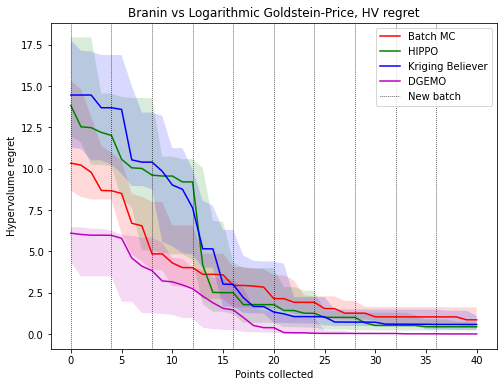

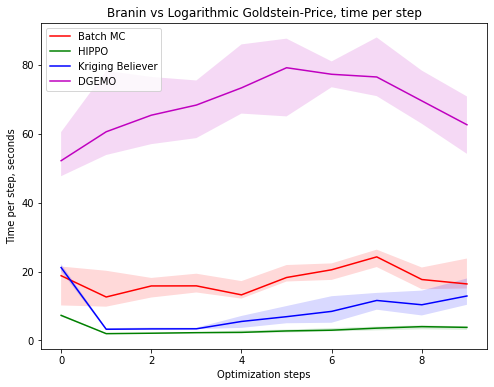

In [12]:
batch_mc_hv_regret = np.loadtxt("results/BatchMC_BraninGoldsteinPrice_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None", delimiter=",")
hippo_hv_regret = np.loadtxt("results/HIPPO_BraninGoldsteinPrice_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None", delimiter=",")
kb_hv_regret = np.loadtxt("results/KB_BraninGoldsteinPrice_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None", delimiter=",")
dgemo_hv_regret = np.loadtxt("results/DGEMO_bgp_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None", delimiter=",")

batch_mc_time = np.loadtxt("results/BatchMC_BraninGoldsteinPrice_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None_time", delimiter=",")
hippo_time = np.loadtxt("results/HIPPO_BraninGoldsteinPrice_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None_time", delimiter=",")
kb_time = np.loadtxt("results/KB_BraninGoldsteinPrice_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None_time", delimiter=",")
dgemo_time = np.loadtxt("results/DGEMO_bgp_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None_time", delimiter=",")

n_query_points = 4
n_optimization_steps = 10



# regret
x = range(n_query_points * n_optimization_steps + 1)

plot_median_quantiles(x, batch_mc_hv_regret, 'r', 'Batch MC')
plot_median_quantiles(x, hippo_hv_regret, 'g', 'HIPPO')
plot_median_quantiles(x, kb_hv_regret, 'b', 'Kriging Believer')
plot_median_quantiles(x, dgemo_hv_regret, 'm', 'DGEMO')
plt.axvline(x=0, c='k', ls=':', lw=0.75, label="New batch")
for xc in range(n_query_points, n_query_points * n_optimization_steps, n_query_points):
    plt.axvline(x=xc, c='k', ls=':', lw=0.75)
plt.title("Branin vs Logarithmic Goldstein-Price, HV regret")
plt.xlabel("Points collected")
plt.ylabel("Hypervolume regret")
plt.legend()
save_plot('branin-goldstein-price_hv_regret')
plt.show()

# time per step
x = range(n_optimization_steps)

plot_median_quantiles(x, batch_mc_time, 'r', 'Batch MC')
plot_median_quantiles(x, hippo_time, 'g', 'HIPPO')
plot_median_quantiles(x, kb_time, 'b', 'Kriging Believer')
plot_median_quantiles(x, dgemo_time, 'm', 'DGEMO')
plt.title("Branin vs Logarithmic Goldstein-Price, time per step")
plt.xlabel("Optimization steps")
plt.ylabel("Time per step, seconds")
plt.legend()
save_plot('branin-goldstein-price_time')
plt.show()

## Batch size experiments

2022-04-04 15:14:26.579882: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-04 15:14:26.579928: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-04-04 15:14:27.762773: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-04 15:14:27.762813: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-04 15:14:27.762828: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-MGDBU2G): /proc/driver/nvidia/version does not exist
2022-04-04 15:14:27.763008: I tensorflow/core/platform/cpu_fe

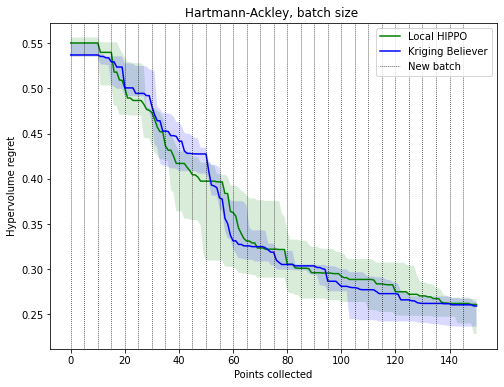

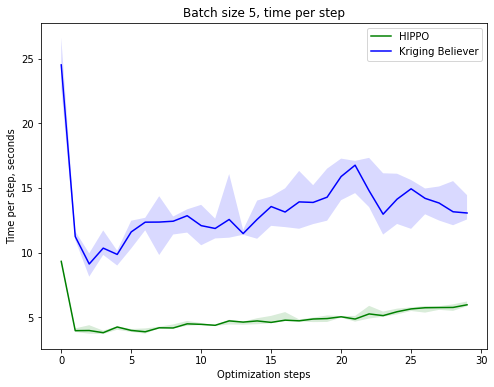

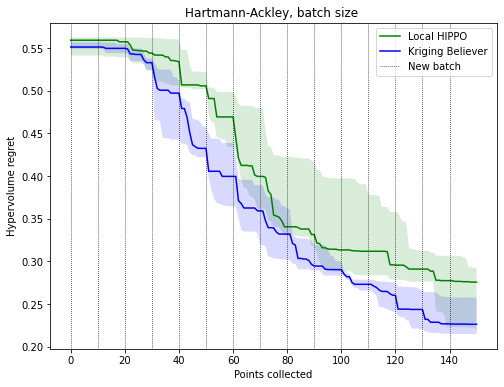

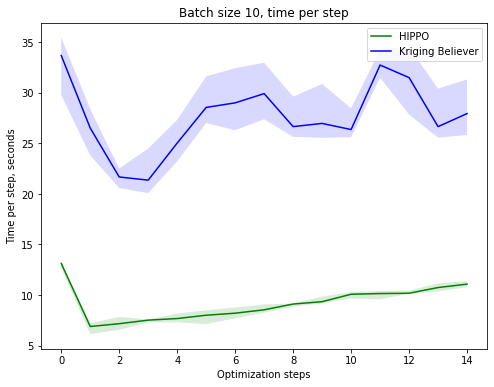

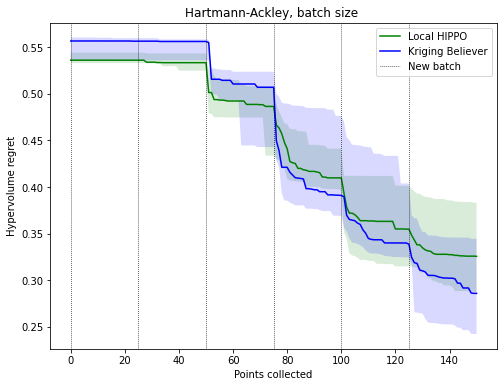

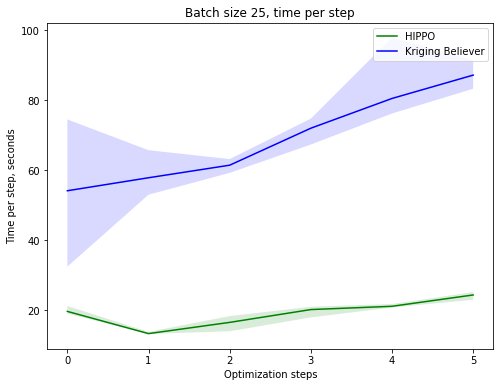

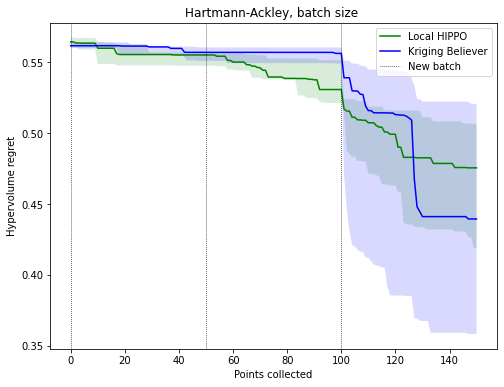

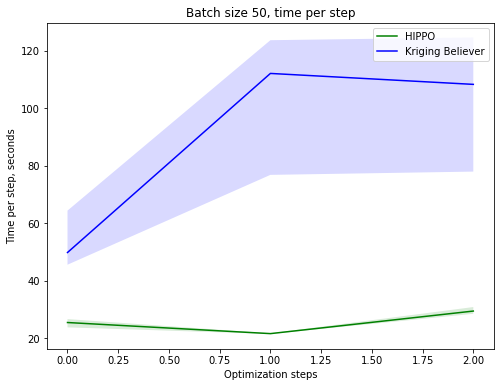

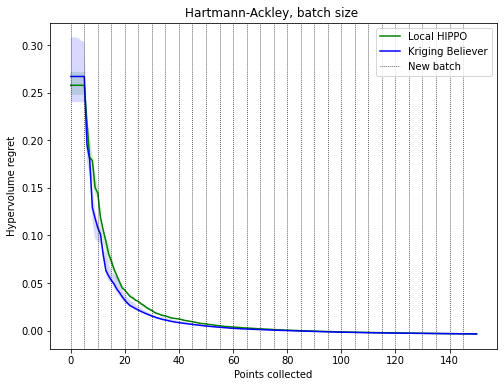

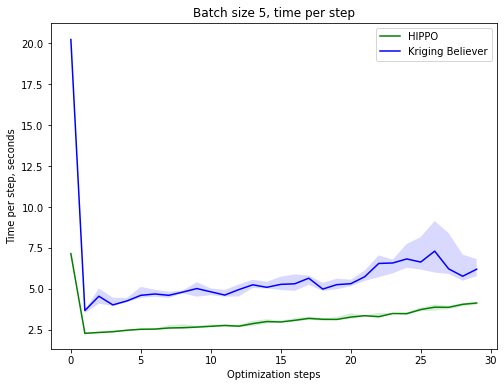

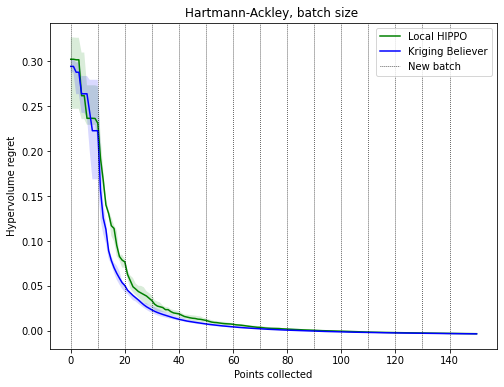

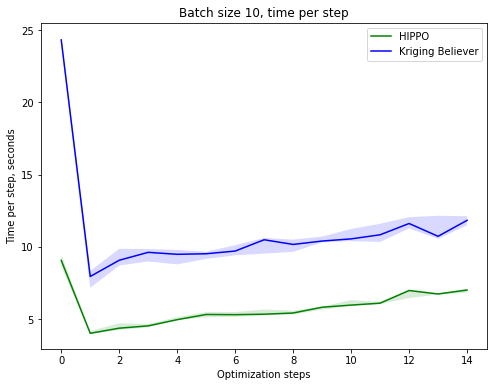

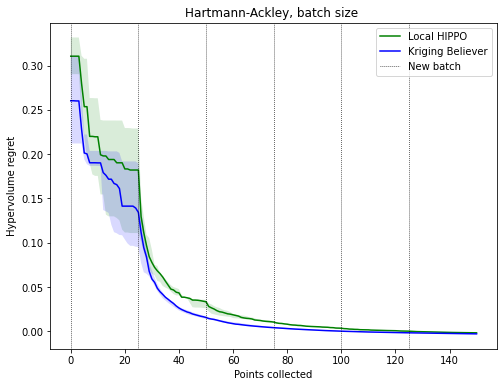

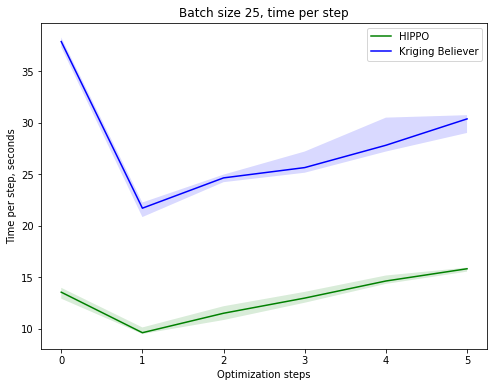

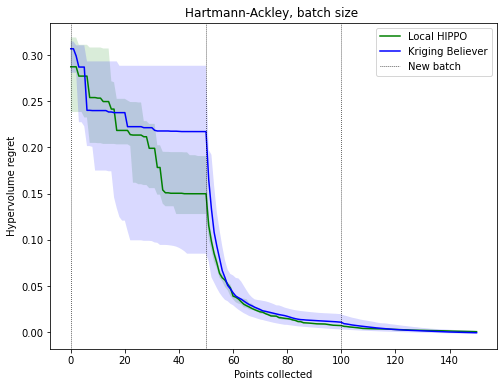

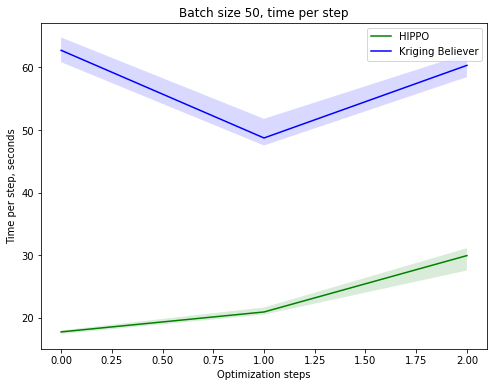

In [13]:
import test_functions

test_func_names = [
        test_functions.ScaledHartmannAckley6D.name,
        test_functions.VLMOP2.name,
    ]

batch_n_steps = [
        (5, 30),
        (10, 15),
        (25, 6),
        (50, 3)
    ]

for test_func_name in test_func_names:
    for batch_size, steps in batch_n_steps:
        
        hippo_hv_regret = np.loadtxt(f"results/batch-size-exp_HIPPO_{test_func_name}_n_initial_points_6_n_query_points_{batch_size}_n_optimization_steps_{steps}_n_repeats_6_seed_None", delimiter=",")
        kb_hv_regret = np.loadtxt(f"results/batch-size-exp_KB_{test_func_name}_n_initial_points_6_n_query_points_{batch_size}_n_optimization_steps_{steps}_n_repeats_6_seed_None", delimiter=",")

        hippo_time = np.loadtxt(f"results/batch-size-exp_HIPPO_{test_func_name}_n_initial_points_6_n_query_points_{batch_size}_n_optimization_steps_{steps}_n_repeats_6_seed_None_time", delimiter=",")
        kb_time = np.loadtxt(f"results/batch-size-exp_KB_{test_func_name}_n_initial_points_6_n_query_points_{batch_size}_n_optimization_steps_{steps}_n_repeats_6_seed_None_time", delimiter=",")

        n_query_points = batch_size
        n_optimization_steps = steps


        # regret
        x = range(n_query_points * n_optimization_steps + 1)

        plot_median_quantiles(x, hippo_hv_regret, 'g', 'Local HIPPO')
        plot_median_quantiles(x, kb_hv_regret, 'b', 'Kriging Believer')
        plt.axvline(x=0, c='k', ls=':', lw=0.75, label="New batch")
        for xc in range(n_query_points, n_query_points * n_optimization_steps, n_query_points):
            plt.axvline(x=xc, c='k', ls=':', lw=0.75)
        plt.title(f"Hartmann-Ackley, batch size ")
        plt.xlabel("Points collected")
        plt.ylabel("Hypervolume regret")
        plt.legend()
        save_plot(f'local-HIPPO_batch-{batch_size}_hv_regret')
        plt.show()


        # time per step
        x = range(n_optimization_steps)

        plot_median_quantiles(x, hippo_time, 'g', 'HIPPO')
        plot_median_quantiles(x, kb_time, 'b', 'Kriging Believer')
        plt.title(f"Batch size {batch_size}, time per step")
        plt.xlabel("Optimization steps")
        plt.ylabel("Time per step, seconds")
        plt.legend()
        save_plot(f'batch-{batch_size}_time')
        plt.show()

## Local HIPPO

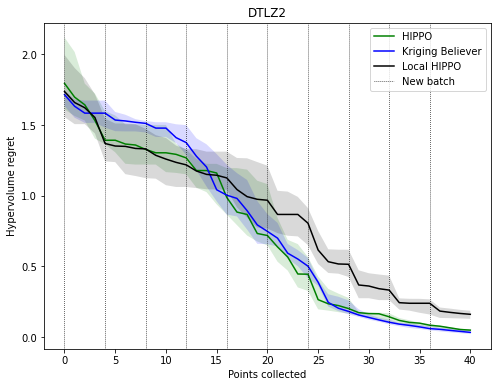

In [14]:
localhippo_hv_regret = np.loadtxt(f"results/LocalHIPPO_DTLZ2_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None", delimiter=",")
hippo_hv_regret = np.loadtxt(f"results/HIPPO_DTLZ2_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None", delimiter=",")
kb_hv_regret = np.loadtxt(f"results/KB_DTLZ2_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None", delimiter=",")

n_query_points = 4
n_optimization_steps = 10


# regret
x = range(n_query_points * n_optimization_steps + 1)

plot_median_quantiles(x, hippo_hv_regret, 'g', 'HIPPO')
plot_median_quantiles(x, kb_hv_regret, 'b', 'Kriging Believer')
plot_median_quantiles(x, localhippo_hv_regret, 'k', 'Local HIPPO')
plt.axvline(x=0, c='k', ls=':', lw=0.75, label="New batch")
for xc in range(n_query_points, n_query_points * n_optimization_steps, n_query_points):
    plt.axvline(x=xc, c='k', ls=':', lw=0.75)
plt.title("DTLZ2")
plt.xlabel("Points collected")
plt.ylabel("Hypervolume regret")
plt.legend()
save_plot('local_exp-DTLZ2_hv_regret')
plt.show()

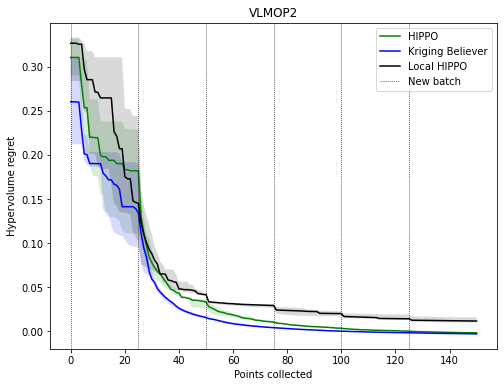

In [15]:
localhippo_hv_regret = np.loadtxt(f"results/batch-size-exp_LocalHIPPO_VLMOP2_n_initial_points_6_n_query_points_25_n_optimization_steps_6_n_repeats_6_seed_None", delimiter=",")
hippo_hv_regret = np.loadtxt(f"results/batch-size-exp_HIPPO_VLMOP2_n_initial_points_6_n_query_points_25_n_optimization_steps_6_n_repeats_6_seed_None", delimiter=",")
kb_hv_regret = np.loadtxt(f"results/batch-size-exp_KB_VLMOP2_n_initial_points_6_n_query_points_25_n_optimization_steps_6_n_repeats_6_seed_None", delimiter=",")

n_query_points = 25
n_optimization_steps = 6


# regret
x = range(n_query_points * n_optimization_steps + 1)

plot_median_quantiles(x, hippo_hv_regret, 'g', 'HIPPO')
plot_median_quantiles(x, kb_hv_regret, 'b', 'Kriging Believer')
plot_median_quantiles(x, localhippo_hv_regret, 'k', 'Local HIPPO')
plt.axvline(x=0, c='k', ls=':', lw=0.75, label="New batch")
for xc in range(n_query_points, n_query_points * n_optimization_steps, n_query_points):
    plt.axvline(x=xc, c='k', ls=':', lw=0.75)
plt.title("VLMOP2")
plt.xlabel("Points collected")
plt.ylabel("Hypervolume regret")
plt.legend()
save_plot('local_exp-VLMOP2_hv_regret')
plt.show()

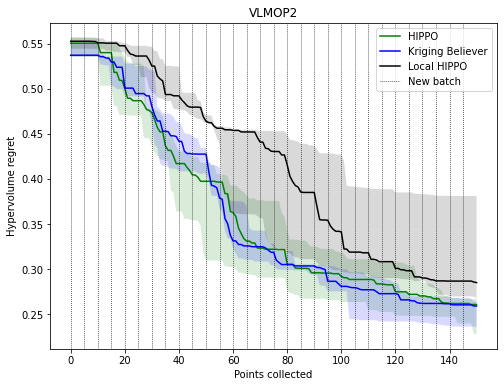

In [16]:
localhippo_hv_regret = np.loadtxt(f"results/batch-size-exp_LocalHIPPO_Hartmann-Ackley-Scaled_n_initial_points_6_n_query_points_5_n_optimization_steps_30_n_repeats_6_seed_None", delimiter=",")
hippo_hv_regret = np.loadtxt(f"results/batch-size-exp_HIPPO_Hartmann-Ackley-Scaled_n_initial_points_6_n_query_points_5_n_optimization_steps_30_n_repeats_6_seed_None", delimiter=",")
kb_hv_regret = np.loadtxt(f"results/batch-size-exp_KB_Hartmann-Ackley-Scaled_n_initial_points_6_n_query_points_5_n_optimization_steps_30_n_repeats_6_seed_None", delimiter=",")

n_query_points = 5
n_optimization_steps = 30


# regret
x = range(n_query_points * n_optimization_steps + 1)

plot_median_quantiles(x, hippo_hv_regret, 'g', 'HIPPO')
plot_median_quantiles(x, kb_hv_regret, 'b', 'Kriging Believer')
plot_median_quantiles(x, localhippo_hv_regret, 'k', 'Local HIPPO')
plt.axvline(x=0, c='k', ls=':', lw=0.75, label="New batch")
for xc in range(n_query_points, n_query_points * n_optimization_steps, n_query_points):
    plt.axvline(x=xc, c='k', ls=':', lw=0.75)
plt.title("VLMOP2")
plt.xlabel("Points collected")
plt.ylabel("Hypervolume regret")
plt.legend()
save_plot('local_exp-Hartmann-Ackley_hv_regret')
plt.show()

## Different warping functions

In [17]:
configs = [
    {
        'name': 'BraninGoldsteinPrice',
        'n_initial_points': 3,
        'n_query_points': 4,
        'n_optimization_steps': 10,
        'plot_title': 'Branin - Goldstein-Price'
    },
    {
        'name': 'DTLZ2',
        'n_initial_points': 3,
        'n_query_points': 4,
        'n_optimization_steps': 10,
        'plot_title': 'DTLZ2'
    },
    {
        'name': 'Hartmann-Ackley-Scaled',
        'n_initial_points': 6,
        'n_query_points': 4,
        'n_optimization_steps': 20,
        'plot_title': 'Hartmann-Ackley'
    },
    {
        'name': 'VLMOP2',
        'n_initial_points': 3,
        'n_query_points': 4,
        'n_optimization_steps': 10,
        'plot_title': 'VLMOP2'
    },
]

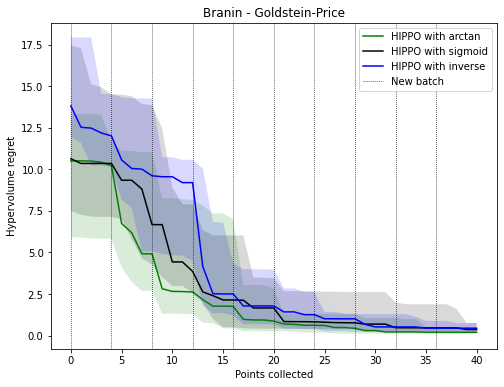

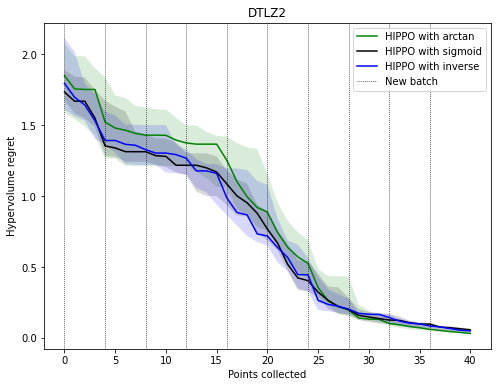

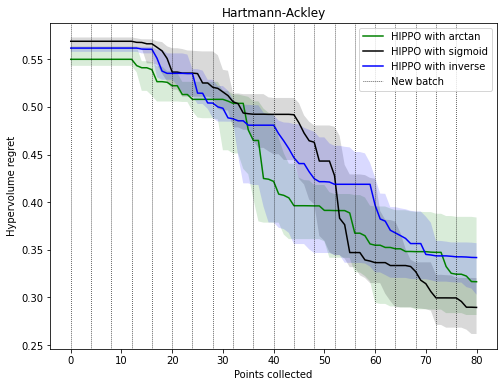

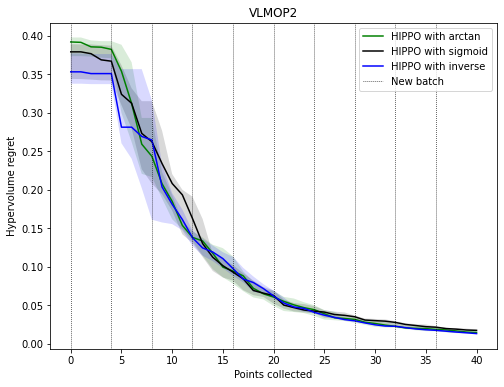

In [20]:
for config in configs:

    filename = f"HIPPO_{config['name']}_n_initial_points_{config['n_initial_points']}" + \
               f"_n_query_points_{config['n_query_points']}" + \
               f"_n_optimization_steps_{config['n_optimization_steps']}" + \
                "_n_repeats_10_seed_None"
    
    sigmoidhippo_hv_regret = np.loadtxt(f"results/sigmoid{filename}", delimiter=",")
    inversehippo_hv_regret = np.loadtxt(f"results/inverse{filename}", delimiter=",")
    hippo_hv_regret = np.loadtxt(f"results/{filename}", delimiter=",")

    n_query_points = config['n_query_points']
    n_optimization_steps = config['n_optimization_steps']


    # regret
    x = range(n_query_points * n_optimization_steps + 1)

    plot_median_quantiles(x, hippo_hv_regret, 'g', 'HIPPO with arctan')
    plot_median_quantiles(x, sigmoidhippo_hv_regret, 'k', 'HIPPO with sigmoid')
    plot_median_quantiles(x, inversehippo_hv_regret, 'b', 'HIPPO with inverse')
    plt.axvline(x=0, c='k', ls=':', lw=0.75, label="New batch")
    for xc in range(n_query_points, n_query_points * n_optimization_steps, n_query_points):
        plt.axvline(x=xc, c='k', ls=':', lw=0.75)
    plt.title(config['plot_title'])
    plt.xlabel("Points collected")
    plt.ylabel("Hypervolume regret")
    plt.legend()
    save_plot(f"warping_exp-{config['name']}_hv_regret")
    plt.show()